In [78]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import pickle

In [79]:
a=open("/content/X_train.pickle","rb")
b=open("/content/X_test.pickle","rb")
c=open("/content/y_train.pickle","rb")
d=open("/content/y_test.pickle","rb")

X_train=pickle.load(a)
X_test=pickle.load(b)
y_train=pickle.load(c)
y_test=pickle.load(d)


In [80]:
print(X_train[10].shape) 
print(y_train. shape)

(32, 32)
(78200,)


In [81]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to the number of labels" 
assert(X_train.shape[1:]==(32,32)), "The dimension of the images are not 28x28"

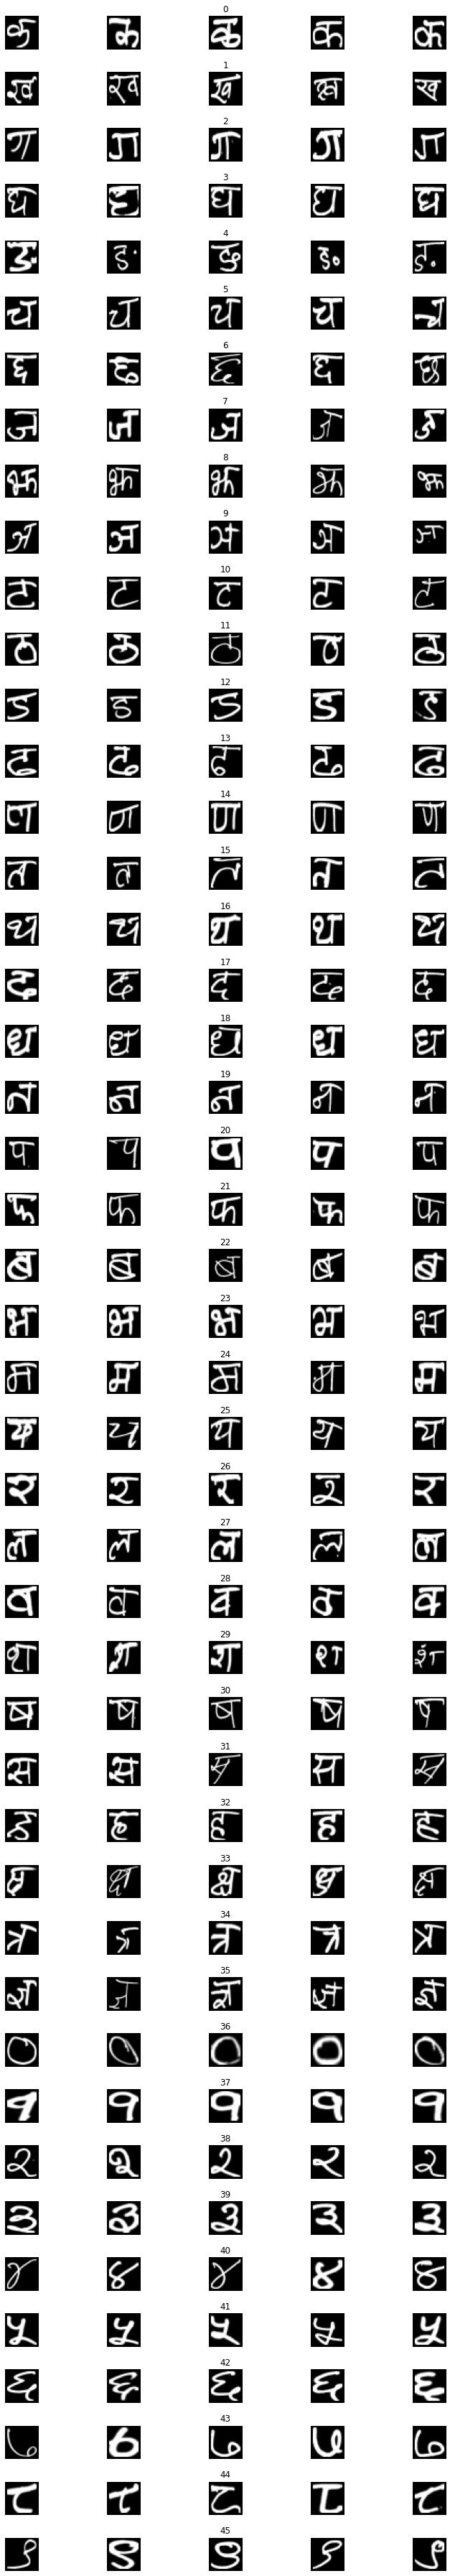

In [82]:
num_of_samples=[]
cols=5
num_classes=46
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(10,50))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700]


Text(0.5, 1.0, 'distribution of the training datasets')

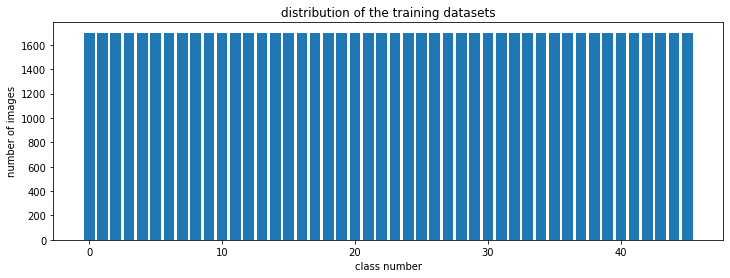

In [83]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.xlabel("class number")
plt.ylabel("number of images")
plt.title("distribution of the training datasets")

In [84]:
X_train=X_train.reshape(78200,32,32,1)

In [85]:
print(X_train.shape)

(78200, 32, 32, 1)


In [86]:
y_train=to_categorical (y_train,46)

In [87]:
def new_model():
  model=Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(32,32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 
  return model

In [88]:
model=new_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               270500    
_________________________________________________________________
dense_12 (Dense)             (None, 46)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [89]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=200,verbose=1,shuffle=1)

Epoch 1/60
352/352 [==============================] - 3s 7ms/step - loss: 3.5565 - accuracy: 0.5008 - val_loss: 27.9234 - val_accuracy: 0.1113
Epoch 2/60
352/352 [==============================] - 2s 6ms/step - loss: 0.2637 - accuracy: 0.9194 - val_loss: 30.2219 - val_accuracy: 0.1023
Epoch 3/60
352/352 [==============================] - 2s 6ms/step - loss: 0.1352 - accuracy: 0.9575 - val_loss: 34.1362 - val_accuracy: 0.1188
Epoch 4/60
352/352 [==============================] - 2s 6ms/step - loss: 0.0837 - accuracy: 0.9725 - val_loss: 35.0945 - val_accuracy: 0.1136
Epoch 5/60
352/352 [==============================] - 2s 6ms/step - loss: 0.0596 - accuracy: 0.9806 - val_loss: 39.3432 - val_accuracy: 0.1169
Epoch 6/60
352/352 [==============================] - 2s 6ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 42.3422 - val_accuracy: 0.1015
Epoch 7/60
352/352 [==============================] - 2s 5ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 40.5186 - val_accuracy: 0.1073

In [90]:
model.save('saved_model.h5')

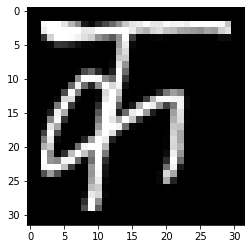

In [101]:
import requests
from PIL import Image
image=plt.imread('/content/1344.png')
plt.imshow(image,cmap=plt.get_cmap('gray'))

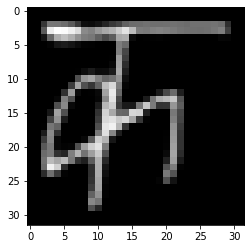

In [103]:
import cv2
image=np.asarray(image)
image=cv2.resize(image,(32,32))
image=cv2.bitwise_not(image)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [93]:
img=image/255

In [104]:
image=image.reshape(1,32,32,1)

In [105]:
from keras.models import load_model
new_model=load_model('/content/saved_model.h5')

In [106]:
print(str(new_model.predict_classes(image)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[20]
